
# Regressão Linear, Ridge e Lasso


Realiza uma análise comparativa entre a Regressão Linear, o Ridge e o Lasso no Boston Housing Dataset.

Baseado no livro: Andreas C. Müller, Sarah Guido (2016)
*Introduction to Machine Learning with Python: A Guide for Data Scientists 1st Edition*.


Este notebook foi desenvolvido para o ambiente GOOGLE COLAB ([colab.research.google.com](https://colab.research.google.com)).

Prof. Cristiano Carvalho

-------------------------------------------------------------------------------

### Base de dados: Boston Housing dataset

http://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html

506 registros

13 atributos + label



In [ ]:
# from sklearn.datasets import load_boston
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso

import numpy as np
import matplotlib.pyplot as plt

# boston = load_boston()
# X = boston.data
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
X = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
y = raw_df.values[1::2, 2]

print("Numero de atributos original:")
print(X.shape,y.shape)

Numero de atributos original:
(506, 13) (506,)


In [ ]:
# X

In [ ]:
# y

In [ ]:
# standardScaler()
X = MinMaxScaler().fit_transform(X) # Quando trabalhamos com dados números em escalas diferentes, alguns algoritmos podem sofrer com a falta de normalização desses números
X

array([[0.00000000e+00, 1.80000000e-01, 6.78152493e-02, ...,
        2.87234043e-01, 1.00000000e+00, 8.96799117e-02],
       [2.35922539e-04, 0.00000000e+00, 2.42302053e-01, ...,
        5.53191489e-01, 1.00000000e+00, 2.04470199e-01],
       [2.35697744e-04, 0.00000000e+00, 2.42302053e-01, ...,
        5.53191489e-01, 9.89737254e-01, 6.34657837e-02],
       ...,
       [6.11892474e-04, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 1.00000000e+00, 1.07891832e-01],
       [1.16072990e-03, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 9.91300620e-01, 1.31070640e-01],
       [4.61841693e-04, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 1.00000000e+00, 1.69701987e-01]])

In [ ]:
y[0:5]

array([24. , 21.6, 34.7, 33.4, 36.2])

### Regressão Linear


Os passos para indução de um modelo são:

1.   Instanciar o modelo: ``` LinearRegression()```
2.   Treinar o modelo: ```fit()```

O método ```score()``` retorna o coeficiente R^2 de predição.


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

print("Regressão Linear (original)")
print("Coeficiente R^2 na base de treinamento: {:.2f}".format(lr.score(X_train, y_train)))

Regressão Linear (original)
Coeficiente R^2 na base de treinamento: 0.75


In [ ]:
print("Coeficiente R^2 na base de teste: {:.2f}".format(lr.score(X_test, y_test)))

Coeficiente R^2 na base de teste: 0.68


In [ ]:
lr.coef_

array([-11.41684968,   2.95517751,   1.33287607,   2.77350326,
        -7.89207097,  22.80053112,  -0.89798872, -15.40519074,
         5.92850858,  -5.21744086,  -8.67735568,   5.22907382,
       -18.75925615])

In [ ]:
lr.intercept_

23.427198204284554

In [ ]:
print("Número de atributos usados: {}".format(np.sum(lr.coef_ != 0)))

Número de atributos usados: 13


In [ ]:
# print("Descrição do modelo: ")
# print([round(v,2) for v in lr.coef_])

# print(round(lr.intercept_,2))

### Podemos derivar novas features, inclusive transformar os dados em polinomiais (xˆ2 * x + C, etc)

### Mas e se tivermos features redundantes ou de baixa contribuição para o modelo?

In [ ]:
# O PolynomialFeaures() aumenta a dimensão dos dados produzindo novos atributos
# que são combinações lineares dos dados originais.
# De um jeito simples a gente consegue gerar novas features, mas temos desvantagens com isso. Lembra qual?

X = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X)

print("Polynomial Features (atributos redundantes):")
print(X.shape)


Polynomial Features (atributos redundantes):
(506, 104)


In [ ]:
X

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)

print("Regressão Linear (com atributos redundantes)")
print("Coeficiente R^2 na base de treinamento: {:.2f}".format(lr.score(X_train, y_train)))
print("Coeficiente R^2 na base de teste: {:.2f}".format(lr.score(X_test, y_test)))
print("Número de atributos usados: {}".format(np.sum(lr.coef_ != 0)))

Regressão Linear (com atributos redundantes)
Coeficiente R^2 na base de treinamento: 0.94
Coeficiente R^2 na base de teste: 0.78
Número de atributos usados: 104


### Ridge (Regressão linear com regularização L2)

Força uma redução do valor dos coeficientes, penalizando coeficientes grandes que não contribuem significativamente para a explicação da variância do sinal.

A força da regularização é dada pelo atributo ```alpha```, com valor *default* igual a 1.


In [ ]:
ridge = Ridge().fit(X_train, y_train)
print("Ridge alpha=1")
print("Coeficiente R^2 na base de treinamento: {:.2f}".format(ridge.score(X_train, y_train)))
print("Coeficiente R^2 na base de teste: {:.2f}".format(ridge.score(X_test, y_test)))
print("Número de atributos usados: {}".format(np.sum(ridge.coef_ != 0)))

ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Ridge alpha=10")
print("Coeficiente R^2 na base de treinamento: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Coeficiente R^2 na base de teste: {:.2f}".format(ridge10.score(X_test, y_test)))
print("Número de atributos usados: {}".format(np.sum(ridge10.coef_ != 0)))


ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Ridge alpha=0.1")
print("Coeficiente R^2 na base de treinamento: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Coeficiente R^2 na base de teste: {:.2f}".format(ridge01.score(X_test, y_test)))
print("Número de atributos usados: {}".format(np.sum(ridge01.coef_ != 0)))



Ridge alpha=1
Coeficiente R^2 na base de treinamento: 0.87
Coeficiente R^2 na base de teste: 0.81
Número de atributos usados: 104
Ridge alpha=10
Coeficiente R^2 na base de treinamento: 0.77
Coeficiente R^2 na base de teste: 0.73
Número de atributos usados: 104
Ridge alpha=0.1
Coeficiente R^2 na base de treinamento: 0.92
Coeficiente R^2 na base de teste: 0.82
Número de atributos usados: 104


### Comparação da Regressão linear e Ridge

O gráfico exibe a magnitude dos coeficientes obtidos por cada método. Pode-se observar como a regularização afeta a magnitude dos coeficientes do Ridge como um todo, mas sem zerar coeficientes de uma forma geral.

In [ ]:
max(abs(ridge01.coef_)), max(abs(ridge.coef_)), max(abs(ridge10.coef_))

(26.23617254240907, 18.061844695407686, 7.818432973533683)

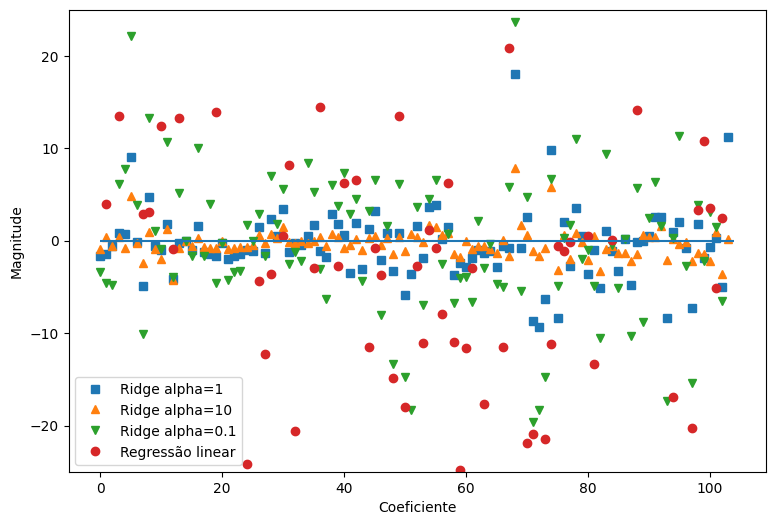

In [ ]:
# matplotlib https://matplotlib.org/stable/gallery/index.html

plt.figure(figsize=(9, 6))
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")
plt.plot(lr.coef_, 'o', label="Regressão linear")
plt.xlabel("Coeficiente")
plt.ylabel("Magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend();


### LASSO (Regressão linear com regularização L1)

Força uma redução do valor dos coeficientes, podendo zerar diversos coeficientes cujos atributos não contribuem significativamente para a previsão. Muito utilizado no apoio à tarefa de seleção de atributos (*feature selection*).

A força da regularização é dada pelo atributo ```alpha```, com valor *default* igual a 1. ```Alpha=0``` resulta na regressão linear tradicional.


In [ ]:
lasso = Lasso().fit(X_train, y_train)
print("Lasso alpha=1")
print("Acurácia na base de treinamento: {:.2f}".format(lasso.score(X_train, y_train)))
print("Acurácia na base de teste: {:.2f}".format(lasso.score(X_test, y_test)))
print("Número de atributos usados: {}".format(np.sum(lasso.coef_ != 0)))


lasso01 = Lasso(alpha=0.1, max_iter=100000).fit(X_train, y_train)
print("Lasso alpha=.1")
print("Acurácia na base de treinamento: {:.2f}".format(lasso01.score(X_train, y_train)))
print("Acurácia na base de teste: {:.2f}".format(lasso01.score(X_test, y_test)))
print("Número de atributos usados: {}".format(np.sum(lasso01.coef_ != 0)))


lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Lasso alpha=.01")
print("Acurácia na base de treinamento: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Acurácia na base de teste: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Número de atributos usados: {}".format(np.sum(lasso001.coef_ != 0)))

lasso0001 = Lasso(alpha=0.001, max_iter=100000).fit(X_train, y_train)
print("Lasso alpha=.001")
print("Acurácia na base de treinamento: {:.2f}".format(lasso0001.score(X_train, y_train)))
print("Acurácia na base de teste: {:.2f}".format(lasso0001.score(X_test, y_test)))
print("Número de atributos usados: {}".format(np.sum(lasso0001.coef_ != 0)))



Observe o que houve com o número de atributos usados em cada grau de regularização


O gráfico exibe a magnitude dos coeficientes obtidos por cada método.

In [ ]:
max(abs(lasso.coef_)), max(abs(lasso001.coef_)), max(abs(lasso0001.coef_))

In [ ]:
plt.figure(figsize=(9, 6))
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso0001.coef_, 'v', label="Lasso alpha=0.001")
plt.plot(lr.coef_, 'o', label="Regressão linear")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coeficiente")
plt.ylabel("Magnitude")

In [ ]:
# Extra: Procure por ElasticNet: Melhor, pior ou igual?
